In [3]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#import sklearn package details
from sklearn.model_selection import train_test_split   #GridSearchCV is imported later from sklearn.model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
#load the dataset for Breast Cancer Detection
# using the UCI repository data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"


In [7]:
df = pd.read_csv(url)

In [8]:
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [33]:
# giving the names of the cols as the data has no col. names. There are 11 cols excluding the ID
names = ['id','clump_thickness','uniform_cell_size','uniform_cell_shape',
        'marginal_adhesion','single_epithelial_size','bare_nuclei',
        'bland_chromatin','normal_nucleoli','mitoses','class']

In [34]:
df = pd.read_csv(url, names=names)
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [35]:
#performing data exploration to understand and preprocess the data
    #using a heat map to see if there are blanks in the dataset
    #sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis') -- df.info() also shows there are no nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                        699 non-null int64
clump_thickness           699 non-null int64
uniform_cell_size         699 non-null int64
uniform_cell_shape        699 non-null int64
marginal_adhesion         699 non-null int64
single_epithelial_size    699 non-null int64
bare_nuclei               699 non-null object
bland_chromatin           699 non-null int64
normal_nucleoli           699 non-null int64
mitoses                   699 non-null int64
class                     699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [43]:
#barenuclei col has some items that are ?. Need to be replaced
df.isin(['?']).any()
df[df.eq('?').any(1)] #.eq is same as == operator

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [46]:
# replacing ? with -99999
df.replace('?',-99999, inplace = True)
df.isin(['?']).any()

id                        False
clump_thickness           False
uniform_cell_size         False
uniform_cell_shape        False
marginal_adhesion         False
single_epithelial_size    False
bare_nuclei               False
bland_chromatin           False
normal_nucleoli           False
mitoses                   False
class                     False
dtype: bool

In [47]:
#print the shape of the dataset
print(df.shape)

(699, 11)


In [48]:
#lets drop the id col. as ML wont be needing this
df.drop(['id'],axis = 1, inplace = True)
df.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [50]:
print(df.shape)

(699, 10)


In [65]:
###PERFORMING DATA VISUALIZATION
print(df.iloc[0]) #shows first row of the dataset. Class value = 2 Benign, 4=Melignant
print(df.describe()) # if I show include ='all' then it will also include bare_nuclei col as that has NaN values
#Good part is all the features are standardized between 1 and 10. So, I can directly use KNN without using StandardScaler

clump_thickness           5
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    2
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 0, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.

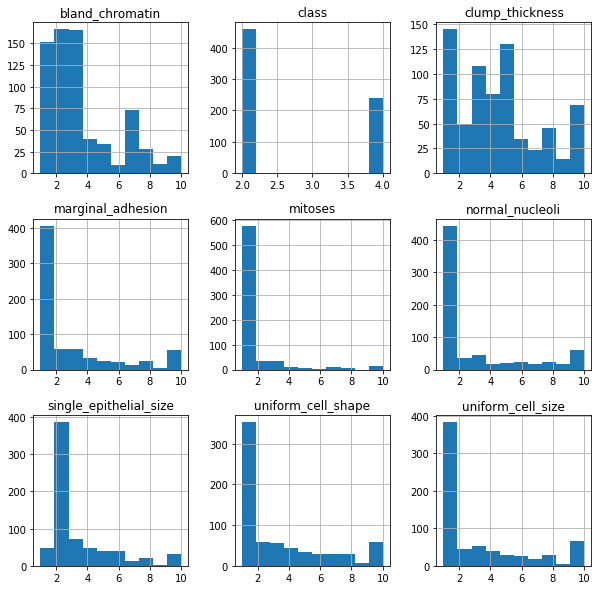

In [80]:
#Plotting histogram for each variable or col
df.hist(figsize =(10,10))
plt.show()

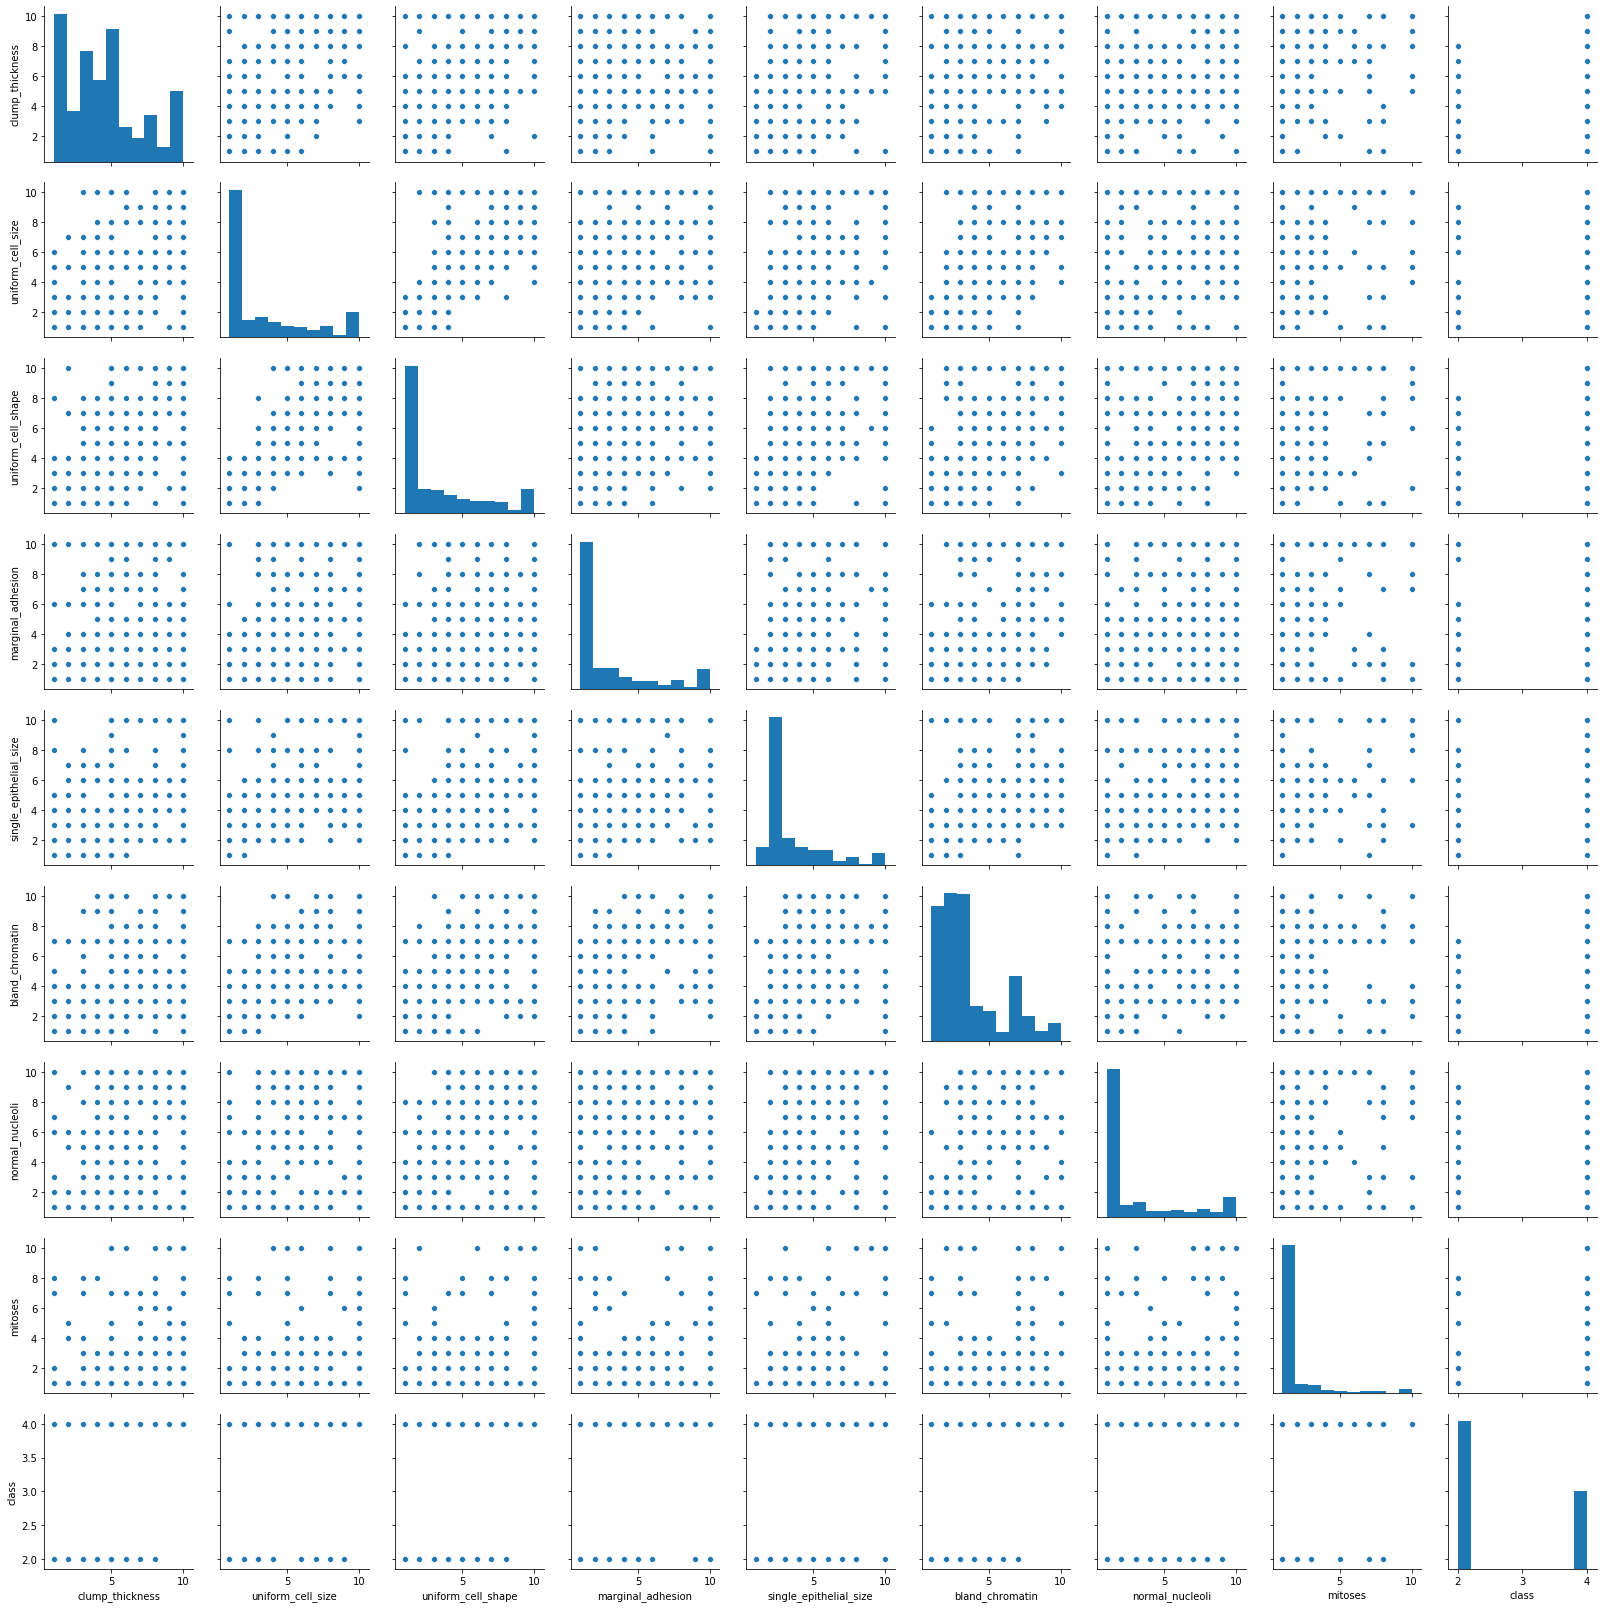

In [88]:
#sns.pairplot(df)
#scatter_matrix(df,figsize = (18,18))

temp = df.drop('bare_nuclei',axis = 1) #pairplot was errorring for bare_nuclei as it has imputed values of -99999
sns.pairplot(temp)
#data does not seem to be having any standout relationship between the features to classify 
#the cell class to be melignant or benign

In [91]:
#Implementing the ML models

X = df.drop('class',axis =1)
y = df['class']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [101]:
#IMPLEMENTING KNN
knn = KNeighborsClassifier(n_neighbors =1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print (classification_report (y_test, pred))

              precision    recall  f1-score   support

           2       0.97      0.96      0.96       138
           4       0.92      0.94      0.93        72

    accuracy                           0.95       210
   macro avg       0.94      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210



In [102]:
#Using elbow method to predict k value for better results
error_rate=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors =i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

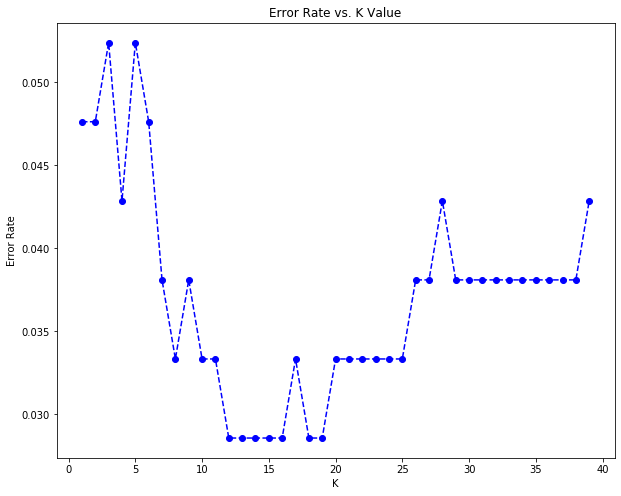

In [105]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40), error_rate, color = 'blue',linestyle ='--',marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [106]:
#From above seems like 11 is a good value for K. Using K=11 and checking for the results -> f1 score improved from 95 to 97
knn = KNeighborsClassifier(n_neighbors =11)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print (classification_report (y_test, pred))

              precision    recall  f1-score   support

           2       0.97      0.98      0.97       138
           4       0.96      0.94      0.95        72

    accuracy                           0.97       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210



In [108]:
#IMPLEMENTING SVC
model = SVC()
model.fit(X_train, y_train)
pred_svc = model.predict(X_test)
print (confusion_matrix (y_test, pred_svc))
print ('\n')
print (classification_report (y_test, pred_svc))

[[126  12]
 [  0  72]]


              precision    recall  f1-score   support

           2       1.00      0.91      0.95       138
           4       0.86      1.00      0.92        72

    accuracy                           0.94       210
   macro avg       0.93      0.96      0.94       210
weighted avg       0.95      0.94      0.94       210



C:\Users\bishnu.mohanty\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [112]:
#KNN has better results vs SVC. Lets try to tune C and gamma values and see if performance improves. 
#Precision has a much lower score
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,verbose =3)
grid.fit(X_train, y_train)

C:\Users\bishnu.mohanty\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.652, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.656, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.654, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.921, total=   0.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.939, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.914, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [114]:
grid.best_params_

{'C': 1, 'gamma': 0.01}

In [115]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [116]:
grid_predictions = grid.predict(X_test)
print (confusion_matrix (y_test, grid_predictions))
print ('\n')
print (classification_report (y_test, grid_predictions))

[[132   6]
 [  3  69]]


              precision    recall  f1-score   support

           2       0.98      0.96      0.97       138
           4       0.92      0.96      0.94        72

    accuracy                           0.96       210
   macro avg       0.95      0.96      0.95       210
weighted avg       0.96      0.96      0.96       210



In [ ]:
##Now we see SVM is very close to KNN